# Web Scraping Tutorial

This tutorial will teach you how to use Python to scrap and extract data from a web page. We will use two packages, `requests` to scrap the webpage and `BeautifulSoup` to extract the data.

Many good references on web scraping are available online. I would recommend the following resources:
1. Automate Boring Stuff with Python by Al Sweigart (2020) has a chapter on Web Scraping tutorial, which can be read [online](https://automatetheboringstuff.com/2e/chapter12/).
2. Web Scraping With Python by Ryan Mitchell (2018) is a bit old book but provides a comprehensive guide to the topic.

## Step 0: Getting to know the web page

In this tutorial, we will try to extract the cryptocurrency market prices from the CoinGecko website https://www.coingecko.com/.

Your first step should always be to familiarize yourself with the website you want to scrape. Take a look at the website and try to inspect the HTML elements on the webpage.

To inspect the HTML elements right click on the webpage and chose Show code (or something similar). You should get something similar to this:
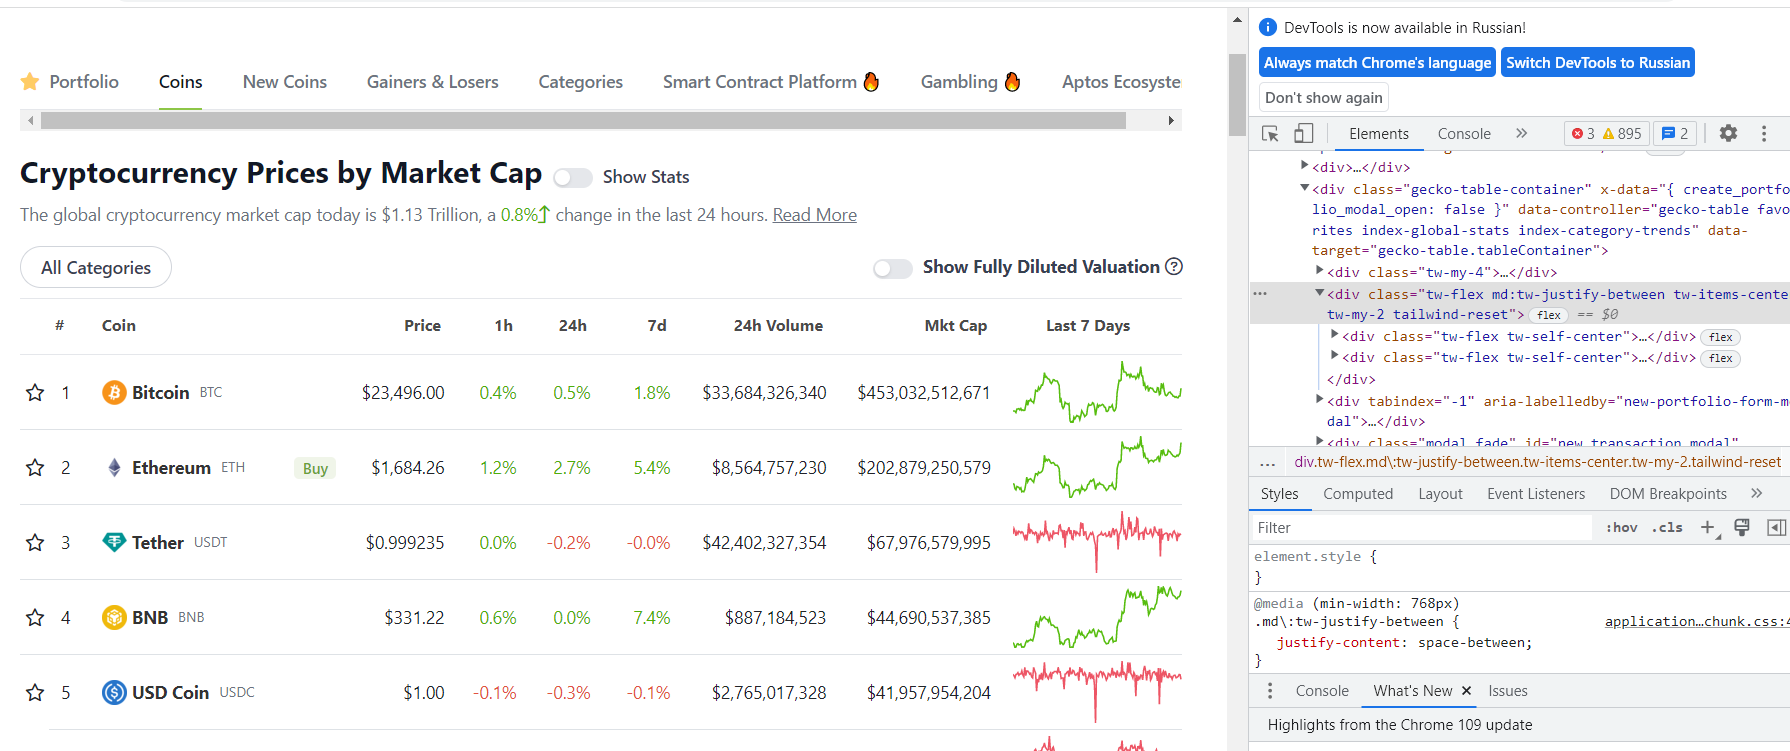

## Step 1: Scrap a web page

Now, we are ready to scrap a webpage we want to get the data from with the `requests` package. We will use the following functions:

* `requests.get('URL')` - make a request to the specified URL
* `r.status_code` - get the status code of the request
* `r.content` - get the binary content of the page

More functions in the `requests` package are available in [its documentation](https://requests.readthedocs.io/en/latest/).

In [12]:
# First, we will import the requests package
import requests
data = requests.get('https://www.coingecko.com/')

In [20]:
# Define headers and Request the webpage
headers = data.headers
r = data.headers

In [17]:
# Show the Type of the request we've got
type(r)

requests.structures.CaseInsensitiveDict

In [18]:
# Check the status code
stats = data.status_code
stats


200

In [16]:
# Get the header of the web page
headers


{'Date': 'Tue, 21 Feb 2023 19:06:41 GMT', 'Content-Type': 'text/html; charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'CF-Ray': '79d1c2b9cdcb640e-ALA', 'Age': '26', 'Cache-Control': 'max-age=30, public, must-revalidate, s-maxage=30', 'Link': '<https://static.coingecko.com/packs/css/application-adb66bc0.chunk.css>; rel=preload; as=style; nopush', 'Vary': 'Accept-Encoding', 'CF-Cache-Status': 'HIT', 'Alternate-Protocol': '443:npn-spdy/2', 'Referrer-Policy': 'strict-origin-when-cross-origin', 'X-Content-Type-Options': 'nosniff', 'X-Download-Options': 'noopen', 'X-Frame-Options': 'SAMEORIGIN', 'X-Permitted-Cross-Domain-Policies': 'none', 'X-Request-Id': '146e76f8-0de5-4649-b346-6bc8961629cf', 'X-Runtime': '0.530952', 'X-XSS-Protection': '0', 'Set-Cookie': '__cf_bm=cyQnDQHfxKECHsOmxFKawYsI8bBccXVckhVQarJiH7I-1677006401-0-AfbxW4XXZcA19P3voRtWlrrHsy2o7oLGeNsBOXXT4LDalz+CVad3ScD4Y24+h1cztIHXOoeZLCk8tEHDkdWpulE=; path=/; expires=Tue, 21-Feb-23 19:36:41 GMT; domain=.c

In [19]:
# Get the content of the web page
cont = data.content
cont

b'<!DOCTYPE html>\n<html lang="en">\n<head>\n<script src="/cdn-cgi/apps/head/gYtXOyllgyP3-Z2iKTP8rRWGBm4.js"></script><script async defer src="https://www.googleoptimize.com/optimize.js?id=GTM-W3CD992"></script>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<script type="text/javascript">window.NREUM||(NREUM={});NREUM.info={"beacon":"bam.nr-data.net","errorBeacon":"bam.nr-data.net","licenseKey":"cd4a6493ab","applicationID":"83495717","transactionName":"dV5dRBNcDlkEEU5SDF9fQB8IXQZQGQ==","queueTime":0,"applicationTime":494,"agent":""}</script>\n<script type="text/javascript">(window.NREUM||(NREUM={})).init={ajax:{deny_list:["bam.nr-data.net"]}};(window.NREUM||(NREUM={})).loader_config={xpid:"VQ4EVVBUCBAIV1VbAgYGUQ==",licenseKey:"cd4a6493ab",applicationID:"83495717"};;(()=>{var e,t,r={9071:(e,t,r)=>{"use strict";r.d(t,{I:()=>n});var n=0,i=navigator.userAgent.match(/Firefox[\\/\\s](\\d+\\.\\d+)/);i&&(n=+i[1])},6562:(e,t,r)=>{"use strict";r.d(t,{P_:()=>p,Mt

In [21]:
# Save the content of web page to the local drive
url = 'https://www.coingecko.com/'
store = requests.get(url, allow_redirects=True)

open('coingecko.html', 'wb').write(store.content)

1412276

## Step 2: Extract data from the web page

After we crawled the web page and download it to the local disk, we will use `BeautifulSoup` package to parse HTML file and access the content. We will use the following functions:

**1. Load the web page to BeautifulSoup**
* `soup = BeautifulSoup(html_doc, 'html.parser')` - parse the HTML content to BeautifulSoup object

**2. Get the content of the element**
* `soup.title` - get the title of the page
* `soup.title.string` - get the string in the title tag
* `soup.h1` - get the H1 element in the web page
* `soup.h1.attrs` - get all attributes in the H1 element
* `soup.h1['class']` - get the class attribute in the H1 element

**3. Look for the element in the web page**
* `soup.find('HTML_tag')` - get the element from an HTML tag
* `soup.find_all('HTML_tag')` - get the list of elelemts that has the specified HTML tag
* `soup.select('CSS_selector')` - get the list of elements with the specified [CSS selector](https://www.w3schools.com/cssref/css_selectors.asp)

In [ ]:
# Run this cell if you don't have BeautifulSoup and parser packages installed 
!pip install beautifulsoup4
!pip install lxml
!pip install html5lib

In [3]:
# First, we will import the BeautifulSoup from bs4 package
from bs4 import BeautifulSoup

In [22]:
# Load the web page and parse it to BeautifulSoup
with open('coingecko.html', encoding='utf-8') as store:
    load = BeautifulSoup(store, 'html.parser')

In [23]:
# Check the type of our soup object
type(load)

bs4.BeautifulSoup

In [24]:
# Get all text in the web page
load.get_text

<bound method PageElement.get_text of <!DOCTYPE html>

<html lang="en">
<head>
<script src="/cdn-cgi/apps/head/gYtXOyllgyP3-Z2iKTP8rRWGBm4.js"></script><script async="" defer="" src="https://www.googleoptimize.com/optimize.js?id=GTM-W3CD992"></script>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<link href="/favicon.ico" rel="shortcut icon"/>
<link href="/OpensearchDescription.xml" rel="search" type="application/opensearchdescription+xml">
<title>Cryptocurrency Prices, Charts, and Crypto Market Cap | CoinGecko</title>
<meta content="View top cryptocurrency prices live, crypto charts, market cap, and trading volume. Discover today’s new and trending coins, top crypto gainers and losers in the market." name="description">
<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
  new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
  j=d.createElement(s

In [25]:
# Get the title of the page
load.title


<title>Cryptocurrency Prices, Charts, and Crypto Market Cap | CoinGecko</title>

In [27]:
# We can also get the page title using soup.find() function
load.find('title')

<title>Cryptocurrency Prices, Charts, and Crypto Market Cap | CoinGecko</title>

In [28]:
# Other HTML tags also work too
load.h1

<h1 class="tw-font-bold tw-text-gray-900 dark:tw-text-white dark:tw-text-opacity-87 md:tw-text-2xl tw-text-xl tw-mb-2 tw-mr-2 tw-pb-0 tw-mb-0" data-view-component="true">
Cryptocurrency Prices by Market Cap
</h1>

Now, we will extract the cryptocurrencies market price from the table.

In [29]:
# Get the table element in the web page
tablel = load.table

In [31]:
# Get the table headers
tablel.tr.find_all('th')

[<th class="cg-sticky-col-header cg-sticky-first-col" data-sort-method="none"></th>,
 <th class="table-number cg-sticky-col-header cg-sticky-second-col">
 #
 </th>,
 <th class="coin-name text-left cg-sticky-col-header cg-sticky-third-col px-0">
 Coin
 </th>,
 <th class="price text-right pl-0" data-sort-method="number">
 Price
 </th>,
 <th class="change1h text-right col-market" data-sort-method="number" style="width: 70px">
 1h
 </th>,
 <th class="change24h text-right col-market" data-sort-method="number" style="width: 70px">
 24h
 </th>,
 <th class="change7d text-right col-market" data-sort-method="number" style="width: 70px">
 7d
 </th>,
 <th class="lit text-right col-market" data-sort-method="number">
 24h Volume
 </th>,
 <th class="cap text-right col-market" data-sort-method="number">
 Mkt Cap
 </th>,
 <th class="fdv text-right col-market tw-hidden" data-sort-method="number">
 FDV
 <span data-content="FDV = Current Price x Max Supply (or total supply if max supply is invalid)&lt;br&

In [32]:
# If there are > 1 elements that match the tagged, 
# use soup.find_all() to retrieve all of them as a list.
load.find_all('tr')

[<tr>
 <th class="cg-sticky-col-header cg-sticky-first-col" data-sort-method="none"></th>
 <th class="table-number cg-sticky-col-header cg-sticky-second-col">
 #
 </th>
 <th class="coin-name text-left cg-sticky-col-header cg-sticky-third-col px-0">
 Coin
 </th>
 <th class="price text-right pl-0" data-sort-method="number">
 Price
 </th>
 <th class="change1h text-right col-market" data-sort-method="number" style="width: 70px">
 1h
 </th>
 <th class="change24h text-right col-market" data-sort-method="number" style="width: 70px">
 24h
 </th>
 <th class="change7d text-right col-market" data-sort-method="number" style="width: 70px">
 7d
 </th>
 <th class="lit text-right col-market" data-sort-method="number">
 24h Volume
 </th>
 <th class="cap text-right col-market" data-sort-method="number">
 Mkt Cap
 </th>
 <th class="fdv text-right col-market tw-hidden" data-sort-method="number">
 FDV
 <span data-content="FDV = Current Price x Max Supply (or total supply if max supply is invalid)&lt;br&gt;

In [ ]:
# Iterate over rows and get the data for each coin


## Step 3: Create data table and save as CSV file

Let's wrap our data table as the pandas's DataFrame and save it as a CSV file.

In [4]:
import pandas as pd

In [35]:
tablel = pd.DataFrame(list(), columns=['Coin', 'Symbol', 'Price', '1h', '24h', '7d', '24h Volume', 'Mkt Cap', 'FDV'])

In [36]:
# Create pandas dataframe with the columns
tablel

Empty DataFrame
Columns: [Coin, Symbol, Price, 1h, 24h, 7d, 24h Volume, Mkt Cap, FDV]
Index: []

In [37]:
# Check the shape of the dataframe
tablel.shape

(0, 9)

In [38]:
# Save dataframe as s
tablel.to_csv('coingecko.csv', index=False)